# Voting History

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Python-setup" data-toc-modified-id="Python-setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Python setup</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data</a></span></li><li><span><a href="#Historical-plots" data-toc-modified-id="Historical-plots-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Historical plots</a></span><ul class="toc-item"><li><span><a href="#Minor-parties" data-toc-modified-id="Minor-parties-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Minor parties</a></span></li><li><span><a href="#Mainstream-parties" data-toc-modified-id="Mainstream-parties-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Mainstream parties</a></span></li><li><span><a href="#Election-cycles" data-toc-modified-id="Election-cycles-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Election cycles</a></span></li></ul></li><li><span><a href="#The-End" data-toc-modified-id="The-End-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>The End</a></span></li></ul></div>

## Python setup

In [1]:
# data science imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# system imports
from io import StringIO
import pathlib

# local imports
import common
from common import COLOR_COALITION, COLOR_LABOR

In [2]:
# plotting stuff
plt.style.use('fivethirtyeight')

## Data

In [3]:
data = """
Year Date        ALP   LP    LNP  NP    CLP  DLP  DEM   GRN   ON   UAP  Others GovtBefore GovtAfter Labor2pp
1946 28-Sep-1946 49.7  33.0  -    10.7  -    -    -     -     -    -    6.6    Labor      Labor     54.1
1949 10-Dec-1949 46.0  39.3  -    10.8  -    -    -     -     -    -    3.9    Labor      Coalition 49.0
1951 28-Apr-1951 47.7  40.5  -    9.7   -    -    -     -     -    -    2.1    Coalition  Coalition 49.3
1954 29-May-1954 50.1  38.5  -    8.5   -    -    -     -     -    -    2.9    Coalition  Coalition 50.7
1955 10-Dec-1955 44.7  39.7  -    7.9   -    5.1  -     -     -    -    2.6    Coalition  Coalition 45.8
1958 22-Nov-1958 42.9  37.1  -    9.3   -    9.4  -     -     -    -    1.3    Coalition  Coalition 45.9
1961 09-Dec-1961 48.0  33.5  -    8.5   -    8.7  -     -     -    -    1.4    Coalition  Coalition 50.5
1963 30-Nov-1963 45.5  37.1  -    8.9   -    7.4  -     -     -    -    1.0    Coalition  Coalition 47.4
1966 26-Nov-1966 40.0  40.1  -    9.8   -    7.3  -     -     -    -    2.7    Coalition  Coalition 43.1
1969 25-Oct-1969 47.0  34.8  -    8.6   -    6.0  -     -     -    -    3.7    Coalition  Coalition 50.2
1972 02-Dec-1972 49.6  32.0  -    9.4   -    5.2  -     -     -    -    3.7    Coalition  Labor     52.7
1974 18-May-1974 49.3  34.9  -    10.8  -    1.4  -     -     -    -    3.5    Labor      Labor     51.7
1975 13-Dec-1975 42.8  41.8  -    11.0  0.2  1.3  -     -     -    -    2.8    Labor      Coalition 44.3
1977 10-Dec-1977 39.6  38.1  -    9.8   0.2  1.4  9.4   -     -    -    1.4    Coalition  Coalition 45.4
1980 18-Oct-1980 45.1  37.4  -    8.6   0.2  0.3  6.6   -     -    -    1.7    Coalition  Coalition 49.6
1983 05-Mar-1983 49.5  34.4  -    9.0   0.2  0.2  5.0   -     -    -    1.7    Coalition  Labor     53.2
1984 01-Dec-1984 47.5  34.1  -    10.6  0.3  0.6  5.4   -     -    -    1.4    Labor      Labor     51.8
1987 11-Jul-1987 45.8  34.3  -    11.5  0.2  -    6.0   -     -    -    2.0    Labor      Labor     50.8
1990 24-Mar-1990 39.4  34.8  -    8.4   0.3  -    11.3  1.4   -    -    4.4    Labor      Labor     49.9
1993 13-Mar-1993 44.9  36.8  -    7.2   0.3  -    3.8   1.9   -    -    5.2    Labor      Labor     51.4
1996 02-Mar-1996 38.8  38.7  -    8.2   0.4  -    6.8   2.9   -    -    4.3    Labor      Coalition 46.4
1998 03-Oct-1998 40.1  33.9  -    5.3   0.3  -    5.1   2.6   8.4  -    4.2    Coalition  Coalition 51.0
2001 10-Nov-2001 37.8  37.1  -    5.6   0.3  -    5.4   5.0   4.3  -    4.4    Coalition  Coalition 49.0
2004 09-Oct-2004 37.6  40.5  -    5.9   0.3  -    1.2   7.2   1.2  -    6.0    Coalition  Coalition 47.26
2007 24-Nov-2007 43.4  36.3  -    5.5   0.3  -    0.7   7.8   0.3  -    5.8    Coalition  Labor     52.70
2010 21-Aug-2010 38.0  30.5  9.1  3.7   0.3  -    0.2   11.8  0.2  -    6.2    Labor      Labor     50.12
2013 07-Sep-2013 33.38 32.02 8.92 4.29  0.32 0.28 0.03  8.65  0.17 5.49 6.45   Labor      Coalition 46.51
2016 02-Jul-2016 34.73 28.67 8.52 4.61  0.24 0.02 -     10.23 1.29 0.00 11.68  Coalition  Coalition 49.64
2019 18-May-2019 33.34 27.99 8.67 4.51  0.27 0.13 0.01  10.40 3.08 3.43 8.17   Coalition  Coalition 48.47
2022 21-May-2022 32.58 23.89 8.00 3.60  0.20 -    -     12.25 4.96 4.12 10.40  Coalition  Labor     52.13"""
#YearDate        ALP   LP    LNP  NP    CLP  DLP  DEM   GRN   ON   UAP  Others GovtBefore GovtAfter Labor2pp

# https://en.wikipedia.org/wiki/Two-party-preferred_vote
# https://www.aph.gov.au/About_Parliament/Parliamentary_Departments/Parliamentary_Library/pubs/rp/rp1617/FederalElectionResults
# https://tallyroom.aec.gov.au/HouseStateFirstPrefsByParty-27966-NAT.htm
# https://results.aec.gov.au/24310/Website/HouseStateFirstPrefsByParty-24310-NAT.htm
# https://results.aec.gov.au/20499/website/HouseStateFirstPrefsByParty-20499-NAT.htm
# https://results.aec.gov.au/17496/website/HouseStateFirstPrefsByParty-17496-NAT.htm
# https://results.aec.gov.au/15508/website/HouseStateFirstPrefsByParty-15508-NAT.htm
# https://results.aec.gov.au/13745/website/HouseStateFirstPrefsByParty-13745-NAT.htm
# https://results.aec.gov.au/12246/results/HouseStateFirstPrefsByParty-12246-NAT.htm

In [4]:
table = pd.read_csv(StringIO(data), header=0, index_col=0, 
                    skipinitialspace=True, sep=' ', na_values='-',
                    parse_dates=['Date'])
table

,Date,ALP,LP,LNP,NP,CLP,DLP,DEM,GRN,ON,UAP,Others,GovtBefore,GovtAfter,Labor2pp
Year,,,,,,,,,,,,,,,
1946,1946-09-28,49.70,33.00,NaN,10.70,NaN,NaN,NaN,NaN,NaN,NaN,6.60,Labor,Labor,54.10
1949,1949-12-10,46.00,39.30,NaN,10.80,NaN,NaN,NaN,NaN,NaN,NaN,3.90,Labor,Coalition,49.00
1951,1951-04-28,47.70,40.50,NaN,9.70,NaN,NaN,NaN,NaN,NaN,NaN,2.10,Coalition,Coalition,49.30
1954,1954-05-29,50.10,38.50,NaN,8.50,NaN,NaN,NaN,NaN,NaN,NaN,2.90,Coalition,Coalition,50.70
1955,1955-12-10,44.70,39.70,NaN,7.90,NaN,5.10,NaN,NaN,NaN,NaN,2.60,Coalition,Coalition,45.80
1958,1958-11-22,42.90,37.10,NaN,9.30,NaN,9.40,NaN,NaN,NaN,NaN,1.30,Coalition,Coalition,45.90
1961,1961-12-09,48.00,33.50,NaN,8.50,NaN,8.70,NaN,NaN,NaN,NaN,1.40,Coalition,Coalition,50.50
1963,1963-11-30,45.50,37.10,NaN,8.90,NaN,7.40,NaN,NaN,NaN,NaN,1.00,Coalition,Coalition,47.40
1966,1966-11-26,40.00,40.10,NaN,9.80,NaN,7.30,NaN,NaN,NaN,NaN,2.70,Coalition,Coalition,43.10


In [5]:
coalition = ['LP', 'LNP', 'NP', 'CLP']
e_others = ['DLP', 'DEM', 'GRN', 'ON', 'UAP', 'Others']
primary = ['ALP', 'LP', 'LNP', 'NP', 'CLP', 
           'DLP', 'DEM', 'GRN', 'ON', 'UAP', 'Others']

In [6]:
# quick data consistency checks
assert(table.index.is_monotonic_increasing)
row_sums = table[primary].sum(axis=1, skipna=True)
assert((row_sums >= 99.8).all() and (row_sums <= 100.2).all())
assert((table['ALP'] < table['Labor2pp']).all())
assert(len(table['GovtBefore'].unique()) == 2)
assert(len(table['GovtAfter'].unique()) == 2)
assert((table['Date'].dt.year == table.index).all())

## Historical plots

### Minor parties

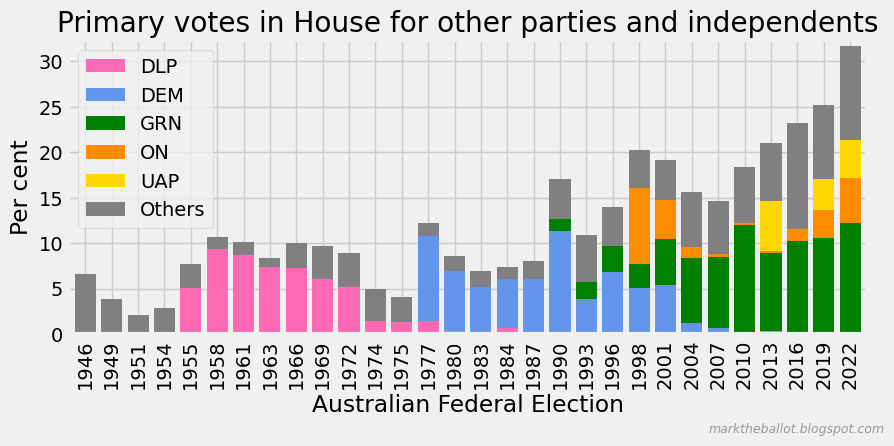

In [7]:
fig, ax = common.initiate_plot()
table[e_others].plot.bar(stacked=True, ax=ax, width=0.8,
                         color=['hotpink', 'cornflowerblue', 
                                 'green', 'darkorange', 'gold',
                                 'grey'])
common.plot_finalise(ax, 
                     title='Primary votes in House for other parties and independents', 
                     xlabel="Australian Federal Election", 
                     ylabel='Per cent', 
                     lfooter=None)

### Mainstream parties

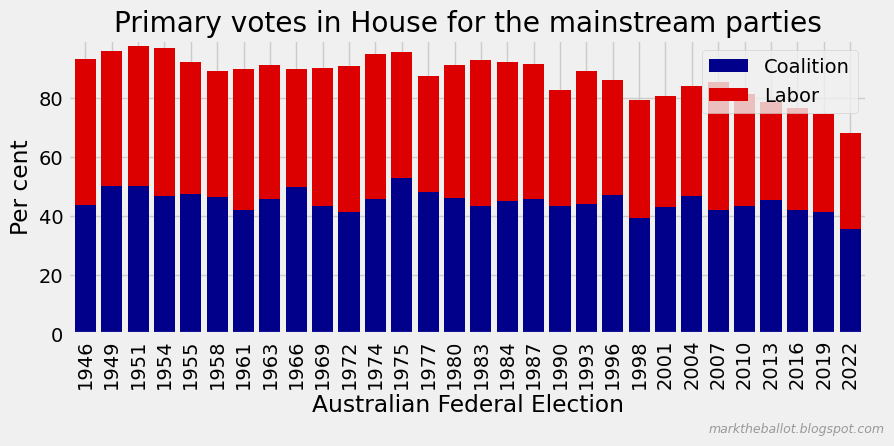

In [8]:
mainstream = table.copy()
mainstream['Coalition'] = mainstream[coalition].sum(axis=1)
mainstream = mainstream.rename(columns={'ALP': 'Labor'})
majors = ['Coalition', 'Labor']
fig, ax = common.initiate_plot()
mainstream[majors].plot.bar(stacked=True, ax=ax, width=0.8, 
                       color=[COLOR_COALITION, COLOR_LABOR])
common.plot_finalise(ax, title='Primary votes in House for the mainstream parties', 
              xlabel="Australian Federal Election", ylabel='Per cent', lfooter=None)

### Election cycles

In [9]:
def add_government(from_table, start, ending,
                   to_cycles, colors, markers):
    
    name = f'{start}-{ending}'
    selection = from_table.index[(from_table.index >= start) 
                                 & (from_table.index <= ending)]
    dates = from_table.loc[selection].Date
    values = from_table.loc[selection].Labor2pp
    if from_table.at[start, 'GovtAfter'] == "Coalition":
        values = 100 - values
        colors[name] = COLOR_COALITION
        markers[name] = MARKER_COALITION
    else:
        colors[name] = COLOR_LABOR
        markers[name] = MARKER_LABOR
    values.index = dates
    to_cycles[name] = values

In [10]:
# identify changes of government at an election ...
changes = table['GovtBefore'] != table['GovtAfter']
change_points = changes[changes].index.values
final = table.index[-1]
if final not in change_points:
    change_points = np.append(change_points, table.index[-1])


# construct separate runs for each government
MARKER_LABOR, MARKER_COALITION = 'o', 's'
cycles = pd.DataFrame(index=table.Date)
colors = {}
markers = {}

start = table.index[0]
for ending in change_points:
    add_government(table, start, ending, 
                   cycles, colors, markers)
    start = ending

# special case - newly elected government
if table.index[-1] in change_points:
    add_government(table, start, ending, 
                   cycles, colors, markers)

# what have we made
cycles

,1946-1949,1949-1972,1972-1975,1975-1983,1983-1996,1996-2007,2007-2013,2013-2022,2022-2022
Date,,,,,,,,,
1946-09-28,54.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1949-12-10,49.0,51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1951-04-28,NaN,50.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1954-05-29,NaN,49.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1955-12-10,NaN,54.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1958-11-22,NaN,54.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961-12-09,NaN,49.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1963-11-30,NaN,52.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1966-11-26,NaN,56.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN


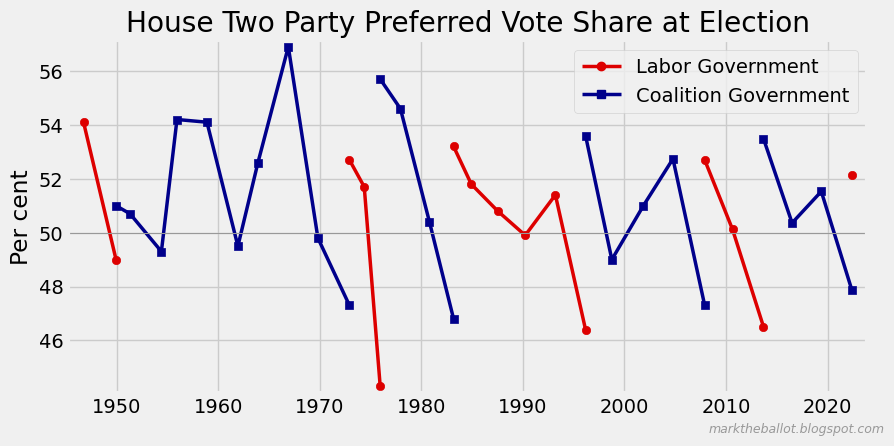

In [11]:
# plot these government cycles
LW = 2.5
fig, ax = common.initiate_plot()
for column in cycles.columns:
    cycles[column].plot.line(ax=ax, c=colors[column], linewidth=LW)
    ax.scatter(cycles.index, cycles[column], marker=markers[column],
               color=colors[column])

# reference line
ax.axhline(y=50, color='#999999', linestyle='-', linewidth=0.75)

# custom legend
custom_lines = [
    Line2D([0], [0], color=COLOR_LABOR, lw=LW, marker=MARKER_LABOR),
    Line2D([0], [0], color=COLOR_COALITION, lw=LW, marker=MARKER_COALITION)
]
ax.legend(custom_lines, ['Labor Government', 'Coalition Government'])

# finalise plot
common.plot_finalise(ax, xlabel=None, ylabel='Per cent', lfooter=None,
                     title='House Two Party Preferred Vote Share at Election',
                     concise_dates=True, straighten_tl=True)

## The End

In [12]:
%load_ext watermark
%watermark -n -u -v -iv -w

Last updated: Fri Oct 20 2023

Python implementation: CPython
Python version       : 3.11.6
IPython version      : 8.16.1

pandas    : 2.1.1
numpy     : 1.25.2
matplotlib: 3.8.0

Watermark: 2.4.3



In [13]:
print('It is done')

It is done
